# Author: [Ruslan Brilenkov](https://www.linkedin.com/in/ruslan-brilenkov-b32640114/)

# Introduction

Here, I describe my business idea. I am going to propose a business problem and a solution - I will build a project from scratch, get (and process) the relevant data, analyze the geospatial and census data, and draw the final conclusions.

In the end, I will draw the relevant conclusions based on the data analysis.


---

# Business problem:

Nowadays, more and more people are "going green", i.e., moving towards a healthier lifestyle - not only by increasing daily movement but also by choosing the healthier (locally-produced, organic, bio+, etc.) products. I support this movement. As the number of "health-is-priority" people is growing, so that the number of organic stores as well.

#### In my view, a good business is one oriented towards the future and growth. Building an organic store has the potential to make and increase our profit.

Currently, I am living close to Amsterdam, so it is a good place to start.

A few words about Amsterdam: it is, probably, the most famous city in the Netherlands; it is considered to be the cultural and international hub for people of various interests and ages. That sounds like a great place to open an organic shop, doesn't it?
The problem is that this place is so busy, touristic, and densely populated so it is quite challenging to find the right place.

We need to be smart about the place to open our shop. It is said that you do not own a cafe/restaurant/shop but you own a place (street, block, district, etc). Because at the end of the day, accessibility to our store will define the number of customers, and the number of customers will determine our profit (provided a high quality). As a business, we want to bring value and support the health of our customers but we also want to get profit in return.

## My Approach
To handle this problem, we will need to know at least 2 things:
1. Census data* (population density)
2. Geospatial data (density of competitors)

*Definition: A census is a procedure of systematically enumerating, and acquiring, and recording information about the members of a given population. This term is used mostly in connection with national population and housing censuses (from Wikipedia)

## How am I going to handle that business problem? 

This is a Data Science problem. As a Data Scientist, I am going to get the relevant (geospatial and census) data, pre-process and analyze it, I will be using relevant tools and packages to handle various steps of the process.

---

# Data

# Part 1: Data Acquisition

In [1]:
# library to handle data in a vectorized manner
import numpy as np 
# library to load dataframe
import pandas as pd

# Matplotlib and associated plotting mhttps://leafletjs.com/odules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# library to handle requests
import requests 
# library to handle advanced web scraping
from bs4 import BeautifulSoup

## Approximately 65 percent of the population are visual learners. 

## So, first of all, I want to visualize the problem. I want to overplot the neighbourhoods over the map of Amsterdam to see what we are dealing with. 


---

# Let us scrape the web for some data:

In [279]:
# website with Amsterdam postal codes
page = requests.get('https://postcode.site/noord-holland/amsterdam')
page


<Response [200]>

<b><Response [200]></b> means that we could reach the website and get a response. It is a green light for us to continue.

In [280]:
# creating an instance soup of BeautifulSoup class to parse the document
soup = BeautifulSoup(page.content, 'html.parser')
# a nice pretty printout
# print(soup.prettify())

### One-two minute assessment of this page suggests that 
### We want the table related to the class="list-group inverse"

In [281]:
all_postcodes = soup.find(class_="list-group inverse")
# print(all_postcodes.prettify())

## Now, let us get a list of these postcodes:

In [5]:

all_zips_list = all_postcodes.find_all('li')
# creating empty array to write ll these zip codes:
all_zips = []

for zip_ in all_zips_list:
#     print(zip_.get_text())
    all_zips.append(zip_.get_text())

print("The list of all Amsterdam zip codes:")
print(all_zips)

The list of all Amsterdam zip codes:
['1000', '1001', '1002', '1003', '1005', '1006', '1007', '1008', '1009', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1086', '1087', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1181', '1183']


## This is great but it is not done yet. We know that the full postal code in the Netherlands contains 4-digit number and 2 letters. 

Now, let us find all the letters to complete our postal codes:

### To do this, let us iterate over each 4-digit number and scrape the relevant page. I want to craete a function to do this automatically:

In [6]:
def scrape_full_zips(zip_):
    
    print("Working with zip code {}".format(zip_))
    # accessing the relevant page for a specific postcode
    page = requests.get("https://postcode.site/noord-holland/amsterdam/{}".format(zip_))
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # getting the right table
    zip_2_digit = soup.find(class_="table table-bordered table-striped table-pnum-one")
#     print(zip_2_digit.prettify())
    
    # dissecting the table on elements
    table_rows = zip_2_digit.find_all('tr')
    
    # appending each row in the final array
    final_array = []
    
    for tr in table_rows:
        #table data/cell
        td = tr.find_all('td')
        row = list([i.text for i in td])
#         final_array.append(row[0])
        try:
#             print(row[0])
            final_array.append(row[0])
            
            
        except Exception as e:
#             print(e)
            pass
        
    return final_array

In [7]:
# creating Pandas data frame
df = pd.DataFrame(columns=["Postal Code"])
df.head()

# creating empty list to append all of the postal codes
My_array = []

# iterating over every set of postal codes
for zip_ in all_zips:
# for zip_ in ['1000', '1001']:
    # running my function of parsing the postal codes
    My_array.extend(scrape_full_zips(zip_ = zip_))

print(My_array)

Working with zip code 1000
Working with zip code 1001
Working with zip code 1002
Working with zip code 1003
Working with zip code 1005
Working with zip code 1006
Working with zip code 1007
Working with zip code 1008
Working with zip code 1009
Working with zip code 1011
Working with zip code 1012
Working with zip code 1013
Working with zip code 1014
Working with zip code 1015
Working with zip code 1016
Working with zip code 1017
Working with zip code 1018
Working with zip code 1019
Working with zip code 1020
Working with zip code 1021
Working with zip code 1022
Working with zip code 1023
Working with zip code 1024
Working with zip code 1025
Working with zip code 1026
Working with zip code 1027
Working with zip code 1028
Working with zip code 1030
Working with zip code 1031
Working with zip code 1032
Working with zip code 1033
Working with zip code 1034
Working with zip code 1035
Working with zip code 1036
Working with zip code 1037
Working with zip code 1040
Working with zip code 1041
W

### We need to add a blacnk space between the 4-digit and 2-letters in the post code

In [8]:
My_array2 = []

for i, postal_code in enumerate(My_array):
    My_array2.append(postal_code[0:4] + " " + postal_code[4:6])

In [9]:
# appending our data frame with every postal code
df["Postal Code"] = My_array2 

# Quick look at our data frame

In [10]:
df

,Postal Code
0,1000 AA
1,1000 AB
2,1000 AC
3,1000 AD
4,1000 AE
...,...
19894,1183 WS
19895,1183 WT
19896,1183 WV
19897,1183 WX


Let us clean up the dataframe a bit

In [11]:
# dropping possible nan values
df2 = df.dropna(subset = ["Postal Code"], inplace=False)

# selecting empty line postal codes
index_to_drop = df2[(df2["Postal Code"] == ' ')].index
# deleting these row indexes from data frame
df2.drop(index_to_drop, inplace=True)

In [12]:
print("DataFrame size before dropping {}".format(df.shape[0]))
print("DataFrame size after dropping {}".format(df2.shape[0]))

DataFrame size before dropping 19899
DataFrame size after dropping 19625


# Part 1.2: Getting Latitude and Longitude of each zip code

## For the sake of simplicity, let us work with a smaller subset of this dataset (say, first 500 postal codes)

In [22]:

# 
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'Organic_Shop_Project')

# adding 1/2 second padding between calls
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geocoder.geocode, min_delay_seconds = 0.0, return_value_on_exception = None) 


latitude = []
longitude = []

# Something cool to check the progress 
from tqdm import tqdm
    
# Let us go over each postal code and get the coordinates:
# for i in tqdm(range(len(df2["Postal Code"]))):
for postal_code in tqdm(df2["Postal Code"][:500]):
    
#     postal_code = df2["Postal Code"][i]
    
#     print("\nWorking on postal code {} ...".format(postal_code))
    
    # initialize the variable to None
    lat_lng_coords = None
    
    attempt = 0
    # loop until we get the coordinates (because sometimes it does not get them at once)
    while(lat_lng_coords is None):
        
        address = "{}, Amsterdam, NL".format(postal_code)
#         print(address)
        # after initiating geocoder
        location = geocode(address)
        # returns location object with longitude, latitude and altitude instances
        try:
            lat_lng_coords = (location.latitude, location.longitude)
        except Exception as e:
#             print(e)
            attempt +=1
        if attempt >= 5:
            lat_lng_coords = (np.nan, np.nan)
            break
        
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    
#     print(latitude, longitude)

100%|██████████| 500/500 [10:15<00:00,  1.23s/it]


In [34]:
# creating a new data frame to hold only the first 500 elements
df3 = df2.head(500)
df3.head()

df3[['Longitude']] = longitude
df3[['Latitude']] = latitude


/home/ruslan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/ruslan/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ruslan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


## As a double-check, let us see how our data frame is looking now

In [35]:
# first 10 rows
df3.head(10)

,Postal Code,Longitude,Latitude
0,1000 AA,4.827809,52.349655
1,1000 AB,4.810650,52.345967
2,1000 AC,4.864598,52.395412
3,1000 AD,4.946133,52.367354
4,1000 AE,4.914232,52.372334
5,1000 AG,4.837311,52.378093
6,1000 AH,4.902348,52.352993
7,1000 AJ,NaN,NaN
8,1000 AK,4.865414,52.365276
9,1000 AL,NaN,NaN


let us drop those NaN values

In [73]:
df3.dropna(subset = ["Postal Code"], how='any', inplace=True)

/home/ruslan/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
df3[['Latitude', 'Longitude']]

,Latitude,Longitude
0,52.349655,4.827809
1,52.345967,4.810650
2,52.395412,4.864598
3,52.367354,4.946133
4,52.372334,4.914232
...,...,...
492,52.375954,4.895332
497,52.368728,4.903583
504,52.362974,4.876817
507,52.376302,4.898026


In [84]:

for lat, lng in zip(df3['Latitude'], df3['Longitude']):
    print(lat, lng)
# df3['Longitude']

52.349655350000006 4.827809045178547
52.3459667 4.8106503
52.3954119 4.8645981
52.3673545 4.946132567039667
52.37233395 4.914231749531422
52.3780928 4.837311
52.3529932 4.9023475
52.365276 4.865414
52.37233395 4.914231749531422
52.37233395 4.914231749531422
52.368404 4.8927669
52.3415463 4.8802689
52.3864375 4.8673224
52.3372479 4.8862188
52.37324315 4.892514790930079
52.3570043 4.9275303
52.4053062 4.8581952
52.3905375 4.9243165
52.37233395 4.914231749531422
52.36506565 4.976728373473207
52.3763021 4.8980264
52.3748304 4.8604693
52.3763021 4.8980264
52.3891709 4.9647102
52.3489619 4.839056408306853
52.3445229 4.8366722
52.3763021 4.8980264
52.3465193 4.9043183
52.3533479 4.9063152
52.3763021 4.8980264
52.3763021 4.8980264
52.37233395 4.914231749531422
52.37233395 4.914231749531422
52.361078250000006 4.87500322056877
52.37233395 4.914231749531422
52.3925541 4.7848326
52.3763021 4.8980264
52.3533507 4.8561703
52.343082 4.9451675
52.3915147 4.9259517
52.37233395 4.914231749531422
52.3763

In [168]:
# let us save the data frame into a csv file

df3.to_csv("Ruslan_Amsterdam_postcodes.csv", encoding='utf-8', index=False)

## Loading dataset (in case we are restarting the code)

In [3]:
df3 = pd.read_csv('Ruslan_Amsterdam_postcodes.csv')
df3.head()

,Postal Code,Longitude,Latitude
0,1000 AA,4.827809,52.349655
1,1000 AB,4.810650,52.345967
2,1000 AC,4.864598,52.395412
3,1000 AD,4.946133,52.367354
4,1000 AE,4.914232,52.372334


---

# Part 1.3: Creating Our Map

## Getting the coordinates of Amsterdam city to center our map

In [5]:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'Organic_Shop_Project')

# adding 1/2 second padding between calls
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geocoder.geocode, min_delay_seconds = 0.0, return_value_on_exception = None) 


geolocator = Nominatim(user_agent="ams_explorer")
location = geolocator.geocode("Amsterdam, NL")
# returns location object with longitude, latitude and altitude instances
latitude_ams = location.latitude
longitude_ams = location.longitude
print('The geograpical coordinate of Amsterdam City are {}, {}.'.format(latitude_ams, longitude_ams))

The geograpical coordinate of Amsterdam City are 52.3727598, 4.8936041.


# Now, we are finally ready to show these addresses on a map

In [6]:
# map rendering library
import folium

In [7]:
# create map of Amsterdam using latitude and longitude values
map_ams = folium.Map(location=[latitude_ams, longitude_ams], zoom_start=12)

# add markers to map
for lat, lng in zip(df3['Latitude'], df3['Longitude']):
#     print(lat, lng)
    label = '{}, {}'.format(df3['Latitude'], df3['Longitude'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ams)  
    
map_ams

# This is great! It is always nice to see what we are working on. 

## A side-note: in the end, we may or may not use these data but definiltely we will use the same principles of data acquisition (scraping from the web). So, let us keep it in mind.

---

---

# Part 2: Exploring Neighborhoods

## Acquisition of census data

## Now, we can talk about the Amsterdam population density for each neighborhood.

### We need to get the data. Let us explore the Open Data website to look for the relevant information:

https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84286NED/table?ts=1558337871247

In [197]:
# Let us download the data in form of the HTML and raed it in the data frame
df_ams = pd.read_html("Amsterdam.html", skiprows=0, header=None)[0]
df_ams


Unnamed: 0_level_0           Unnamed: 1_level_0  \
     Districts and neighborhoods  Districts and neighborhoods   
     Districts and neighborhoods  Districts and neighborhoods   
0                      Amsterdam                    Amsterdam   
1          Burgwallen-Oude Zijde        Burgwallen-Oude Zijde   
2                    Kop Zeedijk                  Kop Zeedijk   
3    Old Church and surroundings  Old Church and surroundings   
4                Burgwallen East              Burgwallen East   
..                           ...                          ...   
574               Gein Northeast               Gein Northeast   
575               Gein Southeast               Gein Southeast   
576                  Three-mouth                  Three-mouth   
577             Village Driemond             Village Driemond   
578          Rural area Driemond          Rural area Driemond   

                                  Topic                       \
    Region designationMunicipality name PopulationPopulation   
                                   name               number   
0                             Amsterdam              854 047   
1                             Amsterdam                4 305   
2                             Amsterdam                1 030   
3                             Amsterdam                  690   
4                             Amsterdam                1 590   
..                                  ...                  ...   
574                           Amsterdam                3 365   
575                           Amsterdam                3 395   
576                           Amsterdam                1 545   
577                           Amsterdam                1 435   
578                           Amsterdam                  110   

                                   \
               Population density   
    number of inhabitants per km²   
0                           5 160   
1                          12 323   
2                          16 999   
3                           7 819   
4                          25 530   
..                            ...   
574                         5 291   
575                         4 733   
576                           883   
577                         4 941   
578                            75   

                                                        \
    IncomeIncome of personsNumber of income recipients   
                                                number   
0                                              672 500   
1                                                3 700   
2                                                  900   
3                                                  600   
4                                                1 300   
..                                                 ...   
574                                              2 800   
575                                              2 800   
576                                              1 200   
577                                              1 200   
578                                                100   

                                                                       \
    Average income per income recipient Average income per inhabitant   
                          x 1,000 euros                 x 1,000 euros   
0                                  36.4                          29.6   
1                                  35.1                          31.7   
2                                     .                             .   
3                                     .                             .   
4                                     .                             .   
..                                  ...                           ...   
574                                34.1                          28.3   
575                                28.2                          23.2   
576                                   .                             .  

## It looks quite messy! We need to tidy it up.

## Some pre-processing

In [198]:
df_ams.columns = ["Districts and neighborhoods", "Districts and neighborhoods copy", "Municipality", 
                  "Population", "Population density", "Number of income recipients", 
                  "Average income per income recipient", "Average income per inhabitant",
                 "40% persons with the lowest income", "20% persons with the highest income",
                 "Active 15-75 years", "40% households with the lowest income", 
                 "20% households with the highest income", "low income housholds", "below or around the social minimum", 
                  "Most common zip code", "Coverage percentage"]

In [199]:
df_ams

,Districts and neighborhoods,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,20% persons with the highest income,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,Most common zip code,Coverage percentage
0,Amsterdam,Amsterdam,Amsterdam,854 047,5 160,672 500,36.4,29.6,39.8,23.8,62.8,51.8,16.9,13.7,13.0,.,.
1,Burgwallen-Oude Zijde,Burgwallen-Oude Zijde,Amsterdam,4 305,12 323,3 700,35.1,31.7,38.2,24.4,72.7,59.2,11.9,15.0,14.3,.,.
2,Kop Zeedijk,Kop Zeedijk,Amsterdam,1 030,16 999,900,.,.,31.4,27.1,78.0,54.9,11.6,13.1,12.1,1012,1
3,Old Church and surroundings,Old Church and surroundings,Amsterdam,690,7 819,600,.,.,42.0,22.8,72.7,63.4,12.4,18.5,17.2,1012,1
4,Burgwallen East,Burgwallen East,Amsterdam,1 590,25 530,1 300,.,.,41.4,20.9,70.7,62.1,9.9,15.3,15.3,1012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Gein Northeast,Gein Northeast,Amsterdam,3 365,5 291,2 800,34.1,28.3,30.3,23.6,64.0,21.3,30.8,2.7,2.4,1106,1
575,Gein Southeast,Gein Southeast,Amsterdam,3 395,4 733,2 800,28.2,23.2,40.7,13.9,58.8,44.6,11.0,12.7,12.0,1107,1
576,Three-mouth,Three-mouth,Amsterdam,1 545,883,1 200,.,.,36.2,23.6,66.0,32.5,27.8,4.4,4.7,.,.
577,Village Driemond,Village Driemond,Amsterdam,1 435,4 941,1 200,.,.,36.9,22.8,65.2,33.7,25.9,4.5,5.0,1109,1


# Part 2.2: Getting Coordinates

## Let us get the corresponding coordinates for each Neighborhood

In [200]:
df_ams[["Districts and neighborhoods"]]

,Districts and neighborhoods
0,Amsterdam
1,Burgwallen-Oude Zijde
2,Kop Zeedijk
3,Old Church and surroundings
4,Burgwallen East
...,...
574,Gein Northeast
575,Gein Southeast
576,Three-mouth
577,Village Driemond


In [167]:

# similar to how we made it before in the preliminary analysis:
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'Organic_Shop_Project')

# adding 1/2 second padding between calls
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geocoder.geocode, min_delay_seconds = 0.0, return_value_on_exception = None) 


latitude = []
longitude = []

# Something cool to check the progress 
from tqdm import tqdm
    
# Let us go over each neighborhood and get the coordinates:
for postal_code in tqdm(df_ams["Districts and neighborhoods"]):
    
    # initialize the variable to None
    lat_lng_coords = None
    
    attempt = 0
    # loop until we get the coordinates (because sometimes it does not get them at once)
    while(lat_lng_coords is None):
        
        address = "{}, Amsterdam, NL".format(postal_code)
#         print(address)
        # after initiating geocoder
        location = geocode(address)
        # returns location object with longitude, latitude and altitude instances
        try:
            lat_lng_coords = (location.latitude, location.longitude)
        except Exception as e:
#             print(e)
            attempt +=1
        if attempt >= 5:
            lat_lng_coords = (np.nan, np.nan)
            break
        
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    
#     print(latitude, longitude)

100%|██████████| 579/579 [14:24<00:00,  1.49s/it]


### Now, let us append the values of latitude and longitude of each district:

In [201]:
df_ams[['Longitude']] = longitude
df_ams[['Latitude']] = latitude

# removing NaNs as before:
df_ams.dropna(subset = ["Longitude"], how='any', inplace=True)

In [202]:
df_ams.head()

,Districts and neighborhoods,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,20% persons with the highest income,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,Most common zip code,Coverage percentage,Longitude,Latitude
0,Amsterdam,Amsterdam,Amsterdam,854 047,5 160,672 500,36.4,29.6,39.8,23.8,62.8,51.8,16.9,13.7,13.0,.,.,4.893604,52.372760
1,Burgwallen-Oude Zijde,Burgwallen-Oude Zijde,Amsterdam,4 305,12 323,3 700,35.1,31.7,38.2,24.4,72.7,59.2,11.9,15.0,14.3,.,.,4.896103,52.371946
4,Burgwallen East,Burgwallen East,Amsterdam,1 590,25 530,1 300,.,.,41.4,20.9,70.7,62.1,9.9,15.3,15.3,1012,1,4.896103,52.371946
7,Burgwallen-Nieuwe Zijde,Burgwallen-Nieuwe Zijde,Amsterdam,3 930,6 881,3 400,38.9,34.8,33.9,27.6,75.4,56.8,13.4,12.9,11.5,.,.,4.889922,52.373706
10,Nieuwendijk North,Nieuwendijk North,Amsterdam,450,8 207,400,.,.,36.7,26.8,74.2,61.3,14.1,15.1,13.5,1012,1,4.896242,52.377567


In [174]:
# let us save the data frame into a csv file, so we do not have to scrape the web anymore
df_ams.to_csv("Ruslan_Amsterdam.csv", encoding='utf-8', index=False)

# Loading dataset directly (in case we restarted the code)

In [42]:
df_ams = pd.read_csv("Ruslan_Amsterdam.csv")
df_ams.head()

df_ams.sort_values(by ='Districts and neighborhoods', ascending=True)

,Districts and neighborhoods,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,20% persons with the highest income,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,Most common zip code,Coverage percentage,Longitude,Latitude
263,AMC,AMC,Amsterdam,35,50,0,.,.,.,.,.,.,.,.,.,1105,1,4.956577,52.292464
42,Afrikahaven,Afrikahaven,Amsterdam,5,.,0,.,.,.,.,.,.,.,.,.,1047,1,4.747800,52.419919
41,Amerikahaven,Amerikahaven,Amsterdam,105,16,100,.,.,.,.,.,.,.,.,.,1045,2,4.773602,52.415751
171,Amstelglorie,Amstelglorie,Amsterdam,80,178,100,.,.,.,.,.,.,.,.,.,1096,1,4.909952,52.333573
173,Amstelkwartier North,Amstelkwartier North,Amsterdam,1 745,6 197,1 500,.,.,34.1,33.9,72.3,56.4,18.0,8.5,6.2,1096,1,4.916486,52.337227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Zuidas,Zuidas,Amsterdam,3 700,1 747,2 800,63.1,53.2,29.3,41.1,73.1,51.3,24.9,4.4,3.3,.,.,4.873445,52.337780
79,Zuidas North,Zuidas North,Amsterdam,450,564,400,.,.,10.5,51.4,91.7,36.5,35.0,1.3,1.3,1077,1,4.873445,52.337780
81,Zuidas South,Zuidas South,Amsterdam,2 110,9 733,1 500,.,.,15.7,53.4,82.0,30.1,35.4,3.3,3.0,1082,1,4.873445,52.337780
259,Zuiderhof,Zuiderhof,Amsterdam,10,58,0,.,.,.,.,.,.,.,.,.,1081,1,4.854869,52.335546


## Data cleaning

In [32]:
# dropping possible nan values
df_ams2 = df_ams.dropna(subset = ["Population density"], inplace=False)

# selecting empty line postal codes
index_to_drop = df_ams2[(df_ams2["Population density"] == '.')].index
# deleting these row indexes from data frame
df_ams2.drop(index_to_drop, inplace=True)

---

# Part 2.3: Creating Maps

In [33]:
# create map of Amsterdam using latitude and longitude values
map_ams = folium.Map(location=[latitude_ams, longitude_ams], zoom_start=12)

# add markers to map
for lat, lng in zip(df_ams2['Latitude'], df_ams2['Longitude']):
#     print(lat, lng)
    label = '{}, {}'.format(df_ams2['Latitude'], df_ams2['Longitude'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ams)  
    
map_ams

# Let us crate a Heat Map to represent the population density

### For a moment, let us simply combine the neighborhoods to generate a heat/density map

We can use this as our proxy for the real population density, and look into the actual population density later.

In [43]:
# let us craete a general map object centered on Amsterdam location, it will make life easier
# to not create this object every time we want to show a new map:
def generateBaseMap(default_location=[latitude_ams, longitude_ams], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


from folium.plugins import HeatMap
df_copy = df_ams2.copy()
df_copy['count'] = 1

base_map = generateBaseMap()

# add markers to map
for lat, lng in zip(df_ams2['Latitude'], df_ams2['Longitude']):
#     print(lat, lng)
    label = '{}, {}'.format(df_ams2['Latitude'], df_ams2['Longitude'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.7,
        parse_html=False).add_to(base_map)  

HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

base_map

## We can see the concentrations of neighborhoods. These are potential places to open our Organic Shop

# A view on a real population density

In [44]:
# create map of Amsterdam using latitude and longitude values
map_ams = folium.Map(location=[latitude_ams, longitude_ams], zoom_start=14)

# print(type(df_ams['Population density'][0]) )
# print(df_ams['Population density'][0].strip(" ") )
# print(df_ams['Population density'][0].replace(" ", "") )
# print(df_ams['Population density'])

# add markers to map
for lat, lng, pop in zip(df_ams2['Latitude'], df_ams2['Longitude'], df_ams2['Population density']):
#     print(pop)
#     print(lat, lng)
    label = '{}, {}'.format(df_ams2['Latitude'], df_ams2['Longitude'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=float(pop.replace(" ", ""))/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.25,
        parse_html=False).add_to(map_ams)  
    
map_ams

---

# Competitors!

## We need to be careful about the competitors. Ideally, it would be better to open the shop in the highly-populated area but without (or with the lowest number of) competitors.

# Let us select only those neighborhoods with the highest population density to keep only potentially the most-profitable places:

In [96]:
# Once more, let us convert the string into floats for the Population Density feature
pop_dens_list = list(df_ams2['Population density'])

for indx, pop_dens in enumerate(pop_dens_list):
    pop_dens_list[indx] = float(pop_dens.replace(" ", ""))
df_ams2['Population density float'] = pop_dens_list
df_ams2['Population density float']

0       5160.0
1      12323.0
2      25530.0
3       6881.0
4       8207.0
        ...   
287     9605.0
288     9686.0
289     5291.0
290     4733.0
291     4941.0
Name: Population density float, Length: 272, dtype: float64

# Visualizing the population density per Amsterdam neighborhood

/home/ruslan/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


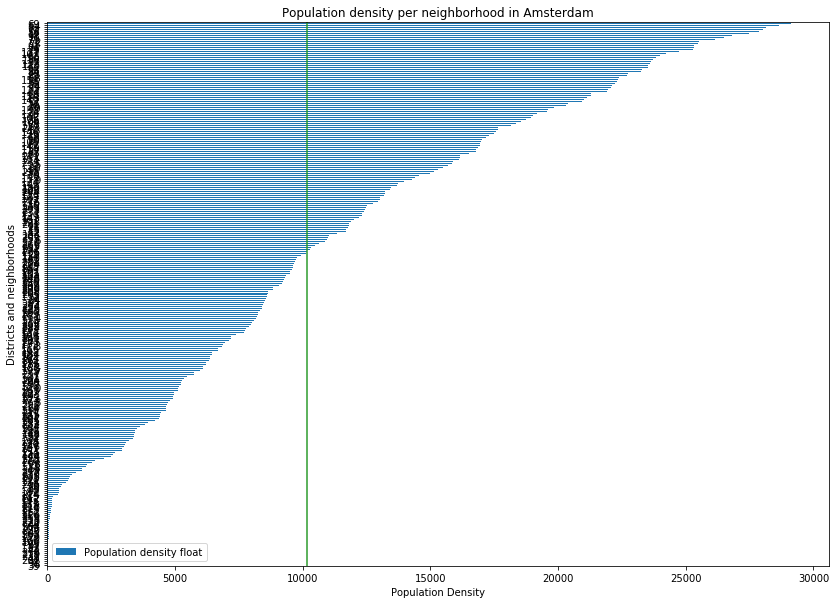

In [101]:
# print(df_ams2.keys() )
df_ams3 = df_ams2[['Districts and neighborhoods', 'Population density float']]
df_ams3.sort_values(["Population density float"], axis=0, ascending=False, inplace=True)
# df_ams3.head()

ax = df_ams3.plot(kind='barh', figsize=(14,10))
ax.set_title('Population density per neighborhood in Amsterdam')
ax.set_xlabel('Population Density')
ax.set_ylabel('Districts and neighborhoods')
ax.invert_yaxis()
# ax.set_yticklabels(df_ams3['Districts and neighborhoods'].values)

# rects = ax.patches

# ax.axvline(61, color='r')

# use axvline to mark the average population density
mean = df_ams3["Population density float"].mean()
ax.axvline(mean, color='#2B9B2A') #Green

# What can we learn from the above figure?

## 1) In comparison to the average population density (green solid line) per neighborhood, there is a number of neighborhoods with significantly higher (and significantly lower) population density. It is not a surprise since the Amsterdam's neighborhoods include many more smaller towns. 

## 2) To proceed with our analysis, we want to select the most densely-populated neighborhoods. I would select the 1/3 from the maximum value (red line) to maximize the potential income from our clients.

---

# Selecting the most densely-populated neighborhood (1/3 from maximum)

In [102]:
max_density = int(df_ams3["Population density float"].max())
print("Maximum population density of Amsterdam's neighborhoods is: {}".format(max_density))

df_ams3 = df_ams3[df_ams3["Population density float"] > max_density/3.]
df_ams3.head()

Maximum population density of Amsterdam's neighborhoods is: 29133


,Districts and neighborhoods,Population density float
69,Frederik Hendrikbuurt Southeast,29133.0
54,Houthavens East,28636.0
62,Staatsliedenbuurt,28139.0
72,Van Lennepbuurt,28005.0
56,Spaarndammerbuurt Northeast,27863.0


# Let us create a final data frame combining these high-density neighborhoods with their corresponding coordinates (latitude and longitude)

In [117]:
df_merge = pd.merge(df_ams3, df_ams2, on=['Districts and neighborhoods'])
df_merge.head()

,Districts and neighborhoods,Population density float_x,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,...,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,Most common zip code,Coverage percentage,Longitude,Latitude,Population density float_y
0,Frederik Hendrikbuurt Southeast,29133.0,Frederik Hendrikbuurt Southeast,Amsterdam,3 295,29 133,2700,39.0,34.1,34.1,...,72.2,53.5,15.1,16.9,14.8,1052,1,4.873743,52.376234,29133.0
1,Houthavens East,28636.0,Houthavens East,Amsterdam,660,28 636,600,.,.,29.4,...,67.4,37.2,25.9,11.3,9.7,1013,1,4.874623,52.401384,28636.0
2,Staatsliedenbuurt,28139.0,Staatsliedenbuurt,Amsterdam,13 315,28 139,11 200,36.3,31.0,35.9,...,69.6,51.4,15.1,14.6,13.9,.,.,4.870951,52.380286,28139.0
3,Van Lennepbuurt,28005.0,Van Lennepbuurt,Amsterdam,6 990,28 005,6000,34.1,29.6,40.6,...,63.4,58.4,11.3,16.5,16.5,.,.,4.868476,52.365297,28005.0
4,Spaarndammerbuurt Northeast,27863.0,Spaarndammerbuurt Northeast,Amsterdam,2 775,27 863,2 300,.,24.8,46.4,...,57.7,63.0,9.9,22.0,20.9,1013,1,4.879369,52.389663,27863.0


# Finally, let us visualize the most densely-populated neighborhoods

In [120]:
from folium.plugins import HeatMap
df_copy2 = df_merge.copy()
df_copy2['count'] = 1

base_map = generateBaseMap()

# add markers to map
for lat, lng, pop in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Population density float_x']):
#     print(lat, lng)
    label = '{}, {}'.format(df_merge['Latitude'], df_merge['Longitude'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.7,
        parse_html=False).add_to(base_map)  

# HeatMap(data=df_copy[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

base_map

### Saving the dataframe into a csv file

In [121]:
# let us save the data frame into a csv file

df_merge.to_csv("Ruslan_Amsterdam_high_pop.csv", encoding='utf-8', index=False)
print("Done. Successfully saved our dataframe.")

Done. Successfully saved our dataframe.


---

# Now, we are ready to explore these neighborhoods in more detail

## So, let us explore the neighborhoods for various venues to find out how many organic stores are there

## To open our own store we need to be sure that there are not a lot of competitors around

---

---

# Part 3: Exploring neighborhoods venues

## We will be using Foursquare API to explore the neighborhoods

## Defining Foursquare credentials and Version

### (due to privacy reasons, I am not showing my credentials here)

## Let us explore the first neighborhood in our data frame.

In [123]:
# "Organic Grocery"

# resetting index
df_merge = df_merge.reset_index(inplace=False)
df_merge.head()
# selecting Neighbourhood based on index:
df_merge.loc[0, 'Districts and neighborhoods']

'Frederik Hendrikbuurt Southeast'

### Getting Neighbourhood latitude and longitude

In [124]:
# neighborhood latitude value
neighborhood_latitude = df_merge.loc[0, 'Latitude'] 
# neighborhood longitude value
neighborhood_longitude = df_merge.loc[0, 'Longitude'] 
# neighborhood name
neighborhood_name = df_merge.loc[0, 'Districts and neighborhoods'] 

print("Latitude and longitude values of '{}' are {}, {}.".format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 'Frederik Hendrikbuurt Southeast' are 52.3762344, 4.8737427.


## Let us explore the neighborhood for any Organic Shops within a given radius

In [126]:
search_radius = 1000 # meters, i.e., 1km
LIMIT = 100
search_query = "Organic"

In [129]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, ACCESS_TOKEN, VERSION, search_query, search_radius, LIMIT)


In [131]:
results = requests.get(url).json()

As a result of our request we get a dictionary of various venues. Let us explore it:

In [135]:
results

{'meta': {'code': 200, 'requestId': '6048f29b9230861b29667ba2'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 1}}],
 'response': {'venues': [{'id': '57816515498e7f187f1da51a',
    'name': 'Organic Food For You',
    'location': {'address': 'Vijzelstraat 129',
     'lat': 52.36955258838164,
     'lng': 4.874671890445277,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.36955258838164,
       'lng': 4.874671890445277}],
     'distance': 746,
     'postalCode': '1017 HJ',
     'cc': 'NL',
     'city': 'Amsterdam',
     'state': 'Noord-Holland',
     'country': 'Nederland',
     'formattedAddress': ['Vijzelstraat 129',
      '1017 HJ Amsterdam',
      'Nederland']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b45',
      'name': 'Organic Grocery',
      'pluralName': 'Organic Groceries',
      'shortName': 'Organic Grocery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'pri

In [132]:
# function that extracts the category of the venue from the requests result
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Let us clean up this json file and craete a data fram out of it

In [133]:
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

In [141]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
# filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']

nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/ruslan/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,categories
0,Organic Food For You,"[{'id': '52f2ab2ebcbc57f1066b8b45', 'name': 'O...",52.369553,4.874672,Organic Grocery
1,Organic farmers market Haarlemmerplein,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",52.384670,4.883621,Miscellaneous Shop
2,Delicious Food Organic,"[{'id': '52f2ab2ebcbc57f1066b8b45', 'name': 'O...",52.378891,4.885562,Organic Grocery


# Great! These are the Organic stores near our first neighborhood.

## Let us repeat this procedure in an automatica way for every neighborhood in our Amsterdam dataset. 

In [166]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            ACCESS_TOKEN, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Let us run this function with our neighborhoods:

In [167]:
amsterdam_venues = getNearbyVenues(names=df_merge['Districts and neighborhoods'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )

Frederik Hendrikbuurt Southeast
Houthavens East
Staatsliedenbuurt
Van Lennepbuurt
Spaarndammerbuurt Northeast
Nieuwmarkt
Transvaalbuurt East
Overtoomse Sluis
Kinkerbuurt
Burgwallen East
Borgerbuurt
Oosterparkbuurt Southwest
Transvaalbuurt
Helmersbuurt East
Van Galenbuurt
Borneo
New Pipe
Oosterparkbuurt Southeast
Devil's Island
Transvaalbuurt West
Landlust North
Schinkelbuurt North
Frederik Hendrikbuurt
Jordan
South Pipe
Haarlemmerbuurt West
Diamantbuurt
Spaarndammerbuurt Southwest
IJselbuurt East
Czaar Peterbuurt
Zeeheldenbuurt
Helmersbuurt
North Dapperbuurt
Gibraltar area
Dapperbuurt South
Frederik Hendrikbuurt North
Rijnbuurt West
Staatsliedenbuurt Northeast
IJselbuurt
Spaarndammerbuurt Southeast
Lastage
Weteringbuurt
Frederik Hendrikbuurt Southwest
IJselbuurt West
Planciusbuurt North
Landlust South
Kattenburg
KNSM island
The Funen
Java Island
Oosterparkbuurt Northwest
Landlust
Overtoomse Veld Noord
Wittenburg
Scheldebuurt West
Kolenkitbuurt South
Valkenburg
Marcanti
Haarlemmerbuurt


## Checking the size of the resulting data frame

In [168]:
print(amsterdam_venues.shape)
amsterdam_venues.head()

(92, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Frederik Hendrikbuurt Southeast,52.376234,4.873743,Organic Food For You,52.369553,4.874672,Organic Grocery
1,Frederik Hendrikbuurt Southeast,52.376234,4.873743,Organic farmers market Haarlemmerplein,52.384670,4.883621,Miscellaneous Shop
2,Frederik Hendrikbuurt Southeast,52.376234,4.873743,Delicious Food Organic,52.378891,4.885562,Organic Grocery
3,Staatsliedenbuurt,52.380286,4.870951,Organic farmers market Haarlemmerplein,52.384670,4.883621,Miscellaneous Shop
4,Staatsliedenbuurt,52.380286,4.870951,Delicious Food Organic,52.378891,4.885562,Organic Grocery


In [186]:
amsterdam_venues['Venue']

0                       Organic Food For You
1     Organic farmers market Haarlemmerplein
2                     Delicious Food Organic
3     Organic farmers market Haarlemmerplein
4                     Delicious Food Organic
                       ...                  
87                    Delicious Food Organic
88                         Tradin Organic HQ
89                                   Organic
90                              Organic Cafe
91                              Organic Cafe
Name: Venue, Length: 92, dtype: object

# It does not look right to me.

## Let us see the number of venues per neighborhood.

In [169]:
amsterdam_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Apollobuurt,2,2,2,2,2,2
Bird meadow,1,1,1,1,1,1
Borgerbuurt,2,2,2,2,2,2
Burgwallen East,2,2,2,2,2,2
Burgwallen-Oude Zijde,2,2,2,2,2,2
Erasmus Park,1,1,1,1,1,1
Frederik Hendrikbuurt,3,3,3,3,3,3
Frederik Hendrikbuurt North,3,3,3,3,3,3
Frederik Hendrikbuurt Southeast,3,3,3,3,3,3


## There is probably one big issue - repeated values, the same shops that were found several times from different neighborhoods.

## There are at least two solution to this problem
### 1) Avoid iteration over the neighborhoods at all and search for all possible venues in Amsterdam in general
### 2) Remove dublicates 

## Let me follow the first solution because I would like to experiment with Foursquare API a bit more.

# I want to extend mhy search or more markets places, and other possible organic places

In [246]:
# Let me define a new function to search for a largen variety of venues
# over a larger area
# but for the fixed coordinates (center of Amsterdam)
def getNearbyVenues2(search_query, names, latitudes, longitudes, radius=10000, LIMIT = 500):
    
#     name, lat, lng = names, latitudes, longitudes
    name, lat, lng = "Amsterdam", latitude_ams, longitude_ams
    
    venues_list=[]
    for query in zip(search_query):
        print("Searching now for {}".format(query))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            ACCESS_TOKEN, 
            VERSION, 
            query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)


In [249]:
query_list = ["Organic Grocery", "Organic", "Marqt"]
#("Organic", "Bio", "Bio+", "Marqt", "Organic Grocery", "")

amsterdam_venues2 = getNearbyVenues2(search_query = query_list,
                                    names=df_merge['Districts and neighborhoods'],
                                    latitudes=df_merge['Latitude'],
                                    longitudes=df_merge['Longitude'],
                                    LIMIT = 500
                                  )

Searching now for ('Organic Grocery',)
Searching now for ('Organic',)
Searching now for ('Marqt',)


In [250]:
np.size(amsterdam_venues2['Venue Longitude'].unique())

24

In [251]:
amsterdam_venues2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amsterdam,52.37276,4.893604,Organic,52.355161,4.871265,Organic Grocery
1,Amsterdam,52.37276,4.893604,Organic Food For You,52.369553,4.874672,Organic Grocery
2,Amsterdam,52.37276,4.893604,Organic farmers market Haarlemmerplein,52.384670,4.883621,Miscellaneous Shop
3,Amsterdam,52.37276,4.893604,Organic Cafe,52.340774,4.886052,Café
4,Amsterdam,52.37276,4.893604,Tradin Organic HQ,52.379781,4.896173,Office


# It seems like there are 24 unique organic shops

In [252]:
# let us save the data frame into a csv file before visualizing it:

amsterdam_venues2.to_csv("Ruslan_Amsterdam_Organic_Shops.csv", encoding='utf-8', index=False)
print("Done. Successfully saved our dataframe.")

Done. Successfully saved our dataframe.


# Part 3.3: Visualization

## Let us show these venues (Organic Shops) on a map

In [253]:
amsterdam_venues2.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amsterdam,52.37276,4.893604,Organic,52.355161,4.871265,Organic Grocery
1,Amsterdam,52.37276,4.893604,Organic Food For You,52.369553,4.874672,Organic Grocery
2,Amsterdam,52.37276,4.893604,Organic farmers market Haarlemmerplein,52.384670,4.883621,Miscellaneous Shop
3,Amsterdam,52.37276,4.893604,Organic Cafe,52.340774,4.886052,Café
4,Amsterdam,52.37276,4.893604,Tradin Organic HQ,52.379781,4.896173,Office
5,Amsterdam,52.37276,4.893604,Delicious Food Organic,52.378891,4.885562,Organic Grocery
6,Amsterdam,52.37276,4.893604,Asian Supermarket,52.362412,4.864116,Grocery Store
7,Amsterdam,52.37276,4.893604,little india indian grocery store,52.357062,4.827664,Grocery Store
8,Amsterdam,52.37276,4.893604,Bierderij Waterland Organic Brewery & Tasting ...,52.458379,5.039865,Brewery
9,Amsterdam,52.37276,4.893604,Organic,52.355161,4.871265,Organic Grocery


In [254]:
np.size(amsterdam_venues2['Venue Latitude'].unique())

24

In [261]:
# Initializing the map object
base_map = generateBaseMap()

# # add markers to map
# for lat, lng, pop, hood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Population density float_x'], df_merge['Districts and neighborhoods']):
# #     print(lat, lng)
#     label = folium.Popup(hood, parse_html=True)
#     folium.CircleMarker(
#         [lat, lng],
#         radius=pop/1500.,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#7b3b3a',
#         fill_opacity=0.3,
#         parse_html=False).add_to(base_map)  

HeatMap(data=df_copy2[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

# adding Organic Shops on our map:

# add pop-up text to each marker on the map
latitudes = list(amsterdam_venues2['Venue Latitude'])
longitudes = list(amsterdam_venues2['Venue Longitude'])
labels = list(amsterdam_venues2['Venue'])

print(len(latitudes), len(longitudes), len(labels))

for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='glyphicon-star'), popup=label).add_to(base_map)


base_map

31 31 31


# What can we conclude from this final map?

### It seems like the central region (that has the highest density of neighborhoods) however there is not a single organic shop --> possibe reason is the high rental price because it is just near the Central Station. 

### Visually, there are some potential areas with a smaller number of competitors but a higher access to neighborhoods.

### But there might be some hidden reasons behind it.

### More data and in-depth analysis is required to draw the final conclusion. It might be done in future work and it would be a great continuation of this project. 

## Here, I will finalize the analysis using the available data I have got.

---

# Part 4. 

## Let us see what can we do about it from a statistical or Data Science point of view and not just speculate about it.


In [271]:
# First of all, let me add a certain area around each Organic Shop to see how many neighborhoods are included there

base_map = generateBaseMap(default_zoom_start = 13)

HeatMap(data=df_copy2[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

# add pop-up text to each marker on the map
latitudes = list(amsterdam_venues2['Venue Latitude'])
longitudes = list(amsterdam_venues2['Venue Longitude'])
labels = list(amsterdam_venues2['Venue'])

print(len(latitudes), len(longitudes), len(labels))

for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='glyphicon-star'), popup=label).add_to(base_map)

    # add a grey circle to represent the search radius
    folium.Circle([lat, lng], radius=1000, color='#004B7F', opacity=0.3, fill = False, fill_opacity=0.3).add_to(base_map)

base_map

31 31 31


# That is something!

## As we can see, the grey circles represent the 1km area from every organic shop. 

### Let us fill in those areas to see it better. ALso, let me change the Heat map to the points of actual neighborhoods - so, we can simply click on them to see their names

In [274]:
# First of all, let me add a certain area around each Organic Shop to see how many neighborhoods are included there

base_map = generateBaseMap(default_zoom_start = 12)

# add markers to map
for lat, lng, pop, hood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Population density float_x'], df_merge['Districts and neighborhoods']):
#     print(lat, lng)
    label = folium.Popup(hood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.3,
        parse_html=False).add_to(base_map)  

# HeatMap(data=df_copy2[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

# add pop-up text to each marker on the map
latitudes = list(amsterdam_venues2['Venue Latitude'])
longitudes = list(amsterdam_venues2['Venue Longitude'])
labels = list(amsterdam_venues2['Venue'])

print(len(latitudes), len(longitudes), len(labels))

for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='glyphicon-star'), popup=label).add_to(base_map)

    # add a grey circle to represent the search radius
    folium.Circle([lat, lng], radius=1000, color='#004B7F', opacity=0.9, fill = True, fill_opacity=0.9).add_to(base_map)

base_map


31 31 31


# Conclusions:

# Based on the above-shown figure, I can suggest that the best palces to open a new Organic Shop would be the neighborhoods of:

- Osdorp-East, Osdorp Central North, Don Bosco (Western far part of Amsterdam)
- The Kolenkit, Kolenkitbuurt North, Kolenkitbuurt South (Western close part of Amsterdam)
- Around Valkenburg (near Central Station)

---

## As anything else, opening a new shop involves certain risks. However, this preliminary conclusion is based on data and logic. So, as the preliminary* conclusion I would recommend opening a new Organic Shop in the above-mentioned location.

### *the further in-depth analysis on a lrager dataset is neccessary to proceed with opening a shop. However, these are the places I would start to research at first.

---

# As a final image, I want to show the clusters of the neighborhoods (upon zoom in and zoom out)

## So, if we just zoom in and zoom out the interactive map, we can reach the same conclusion - that above-mentioned places have both, high density of neighborhoods and low density of competitors.

In [6]:
df_merge = pd.read_csv("Ruslan_Amsterdam_high_pop.csv")
amsterdam_venues2 = pd.read_csv("Ruslan_Amsterdam_Organic_Shops.csv")

latitude_ams, longitude_ams = 52.3727598, 4.8936041

def generateBaseMap(default_location=[latitude_ams, longitude_ams], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [8]:

import folium
from folium import plugins

# First of all, let me add a certain area around each Organic Shop to see how many neighborhoods are included there

base_map = generateBaseMap(default_zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(base_map)

# add markers to map
for lat, lng, pop, hood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Population density float_x'], df_merge['Districts and neighborhoods']):
#     print(lat, lng)
    label = folium.Popup(hood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop/1500.,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#7b3b3a',
        fill_opacity=0.3,
        parse_html=False).add_to(incidents)  

# HeatMap(data=df_copy2[['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=15, max_zoom=12).add_to(base_map)

# add pop-up text to each marker on the map
latitudes = list(amsterdam_venues2['Venue Latitude'])
longitudes = list(amsterdam_venues2['Venue Longitude'])
labels = list(amsterdam_venues2['Venue'])

print(len(latitudes), len(longitudes), len(labels))

for lat, lng, label in zip(latitudes, longitudes, labels):
#     print(lat, lng)
    folium.Marker([lat, lng], icon=folium.Icon(color='blue', icon='glyphicon-star'), popup=label).add_to(base_map)

    # add a grey circle to represent the search radius
    folium.Circle([lat, lng], radius=1000, color='#004B7F', opacity=0.9, fill = True, fill_opacity=0.9).add_to(base_map)

base_map



31 31 31


# With with, I conclude my analysis. 